# DATA COLLECTION

In [12]:
!pip install --upgrade pip

In [13]:
#!pip3 install twint
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio
!pip install twint module from its repo
!pip install -U gensim
!pip install pyLDAvis


In [14]:
conda install git


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [15]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\fabol\appdata\local\temp\pip-install-z2s2dcq7\twint_2a22bc067b5c4fe9847ddb00570d434c

In [16]:
conda install -c conda-forge/label/gcc7 missingno 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install plotly

#scientific and machine learning libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#plotting options
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
#% matplotlib inline
pd.set_option('display.max_colwidth',None)
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#twint
import twint
#to avoid problems with running twint
import nest_asyncio
nest_asyncio.apply()


In [18]:
!pip install spacy

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy

# importing package to recognize stop words i.e. the, and, an etc
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

import datetime

import plotly.express as px

#nltk.download('punkt')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

stemmer = PorterStemmer()

In [55]:
## Sources: 

keywords = ["Digital Museum"]

search_concatenation = keywords


In [56]:
search_concatenation

['Digital Museum']

In [57]:
len(search_concatenation)

1

In [58]:
# the concept is to perform the scraping using the elements in the lists above: imm_basic, immigrant_mod, migrant_mod and refugee_mod
df = []
for s in search_concatenation:
    config = twint.Config()
    config.Search = "Digital Museum"
    config.Lang = "en"
    config.Limit = 10000
    config.Since = "2020-01-01 00:00:00"
    config.Until = "2020-12-05 00:00:00"
    config.Hide_output = True
    config.Pandas = True
    twint.run.Search(config)
    Tweets_df = twint.storage.panda.Tweets_df
    df.append(Tweets_df)  
    
# see pd.concat documentation for more info
df = pd.concat(df).sort_values(by=['date']).reset_index()


print(len(df))

10076


In [59]:
df.shape

(10076, 39)

In [60]:
# with this command I'm checking 

df.groupby('search').sum().shape, len(search_concatenation)

((1, 9), 1)

In [54]:
##Save Uncleaned Data 
##(SAVE YOUR FIRST SEARCHED TWEETS HERE) 
## AFTER SAVING GO BACK TO SEARCH WITH A NEW KEYWORDS IN CELL 8.SAVE THE NEXT SEARCHED TWEETS IN THE NEXT CELL

df.to_csv('Museum_Technology.csv')

In [31]:
##Save Uncleaned Data 
##(SAVE YOUR SECOND SEARCHED TWEETS HERE)
##AFTER SAVING GO BACK TO SEARCH WITH A NEW KEYWORDS IN CELL 8.SAVE THE NEXT SEARCHED TWEETS IN THE NEXT CELL

df.to_csv('Museum_tech.csv')

In [61]:
##Save Uncleaned Data 
##(SAVE YOUR THIRD SEARCHED TWEETS HERE) 
##AFTER SAVING GO BACK TO SEARCH WITH A NEW KEYWORDS IN CELL 8. SAVE THE NEXT SEARCHED TWEETS IN THE NEXT CELL

df.to_csv('Digital_Museum-19.csv')

In [62]:
df1=pd.read_csv('Museum_Technology.csv')
df2=pd.read_csv('Museum_tech.csv')
df3=pd.read_csv('Digital_Museum-19.csv')

In [63]:
## merge all dataframes
df_list = [df1,df2,df3]
df = pd.concat(df_list)

In [64]:
##SAVE MERGED DATA HERE

df.to_csv("MergedUncleanedData.csv")

In [65]:
##READ OR IMPORT MERGED DATA HERE

df=pd.read_csv("MergedUncleanedData.csv")

# DATA CLEANING

In [66]:
df.head()

,Unnamed: 0,Unnamed: 0.1,index,id,conversation_id,created_at,date,timezone,place,tweet,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,0,9871,1212176736928055296,1212176736928055296,1.577840e+12,2019-12-31 20:00:29,-500,NaN,"#LA @SelfiesMuseum is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture! https://t.co/Gl0EFSagC9",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1,9870,1212186191669235713,1212186191669235713,1.577843e+12,2019-12-31 20:38:04,-500,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,2,9869,1212189488413364224,1212189488413364224,1.577843e+12,2019-12-31 20:51:10,-500,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,3,9868,1212213144539598853,1212213144539598853,1.577849e+12,2019-12-31 22:25:10,-500,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog https://t.co/ALfJV8NAqa,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,4,9867,1212258337913356288,1212258337913356288,1.577860e+12,2020-01-01 01:24:45,-500,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25420 non-null  int64  
 1   Unnamed: 0.1     25420 non-null  int64  
 2   index            25420 non-null  int64  
 3   id               25420 non-null  int64  
 4   conversation_id  25420 non-null  int64  
 5   created_at       25420 non-null  float64
 6   date             25420 non-null  object 
 7   timezone         25420 non-null  int64  
 8   place            207 non-null    object 
 9   tweet            25420 non-null  object 
 10  language         25420 non-null  object 
 11  hashtags         25420 non-null  object 
 12  cashtags         25420 non-null  object 
 13  user_id          25420 non-null  int64  
 14  user_id_str      25420 non-null  int64  
 15  username         25420 non-null  object 
 16  name             25420 non-null  object 
 17  day         

In [68]:
df['INCDTTM'] =  pd.to_datetime(df['date'], infer_datetime_format=True)
df['Time'] = [datetime.datetime.time(d) for d in df['INCDTTM']] 
df['Date'] = [datetime.datetime.date(d) for d in df['INCDTTM']]
df['Year'] = [datetime.datetime.date(d).year for d in df['INCDTTM']] 
df['Month'] = [datetime.datetime.date(d).month for d in df['INCDTTM']] 
df = df.drop(columns = ['date','INCDTTM'])
df.head()

,Unnamed: 0,Unnamed: 0.1,index,id,conversation_id,created_at,timezone,place,tweet,language,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Time,Date,Year,Month
0,0,0,9871,1212176736928055296,1212176736928055296,1.577840e+12,-500,NaN,"#LA @SelfiesMuseum is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture! https://t.co/Gl0EFSagC9",en,...,NaN,[],NaN,NaN,NaN,NaN,20:00:29,2019-12-31,2019,12
1,1,1,9870,1212186191669235713,1212186191669235713,1.577843e+12,-500,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,en,...,NaN,[],NaN,NaN,NaN,NaN,20:38:04,2019-12-31,2019,12
2,2,2,9869,1212189488413364224,1212189488413364224,1.577843e+12,-500,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,en,...,NaN,[],NaN,NaN,NaN,NaN,20:51:10,2019-12-31,2019,12
3,3,3,9868,1212213144539598853,1212213144539598853,1.577849e+12,-500,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog https://t.co/ALfJV8NAqa,en,...,NaN,[],NaN,NaN,NaN,NaN,22:25:10,2019-12-31,2019,12
4,4,4,9867,1212258337913356288,1212258337913356288,1.577860e+12,-500,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",en,...,NaN,[],NaN,NaN,NaN,NaN,01:24:45,2020-01-01,2020,1


In [69]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'id', 'conversation_id',
       'created_at', 'timezone', 'place', 'tweet', 'language', 'hashtags',
       'cashtags', 'user_id', 'user_id_str', 'username', 'name', 'day', 'hour',
       'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes',
       'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'Time', 'Date', 'Year',
       'Month'],
      dtype='object')

In [70]:
df=df.drop(['index', 'id', 'conversation_id', 'created_at', 'timezone', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'Time',], axis=1)

In [71]:
df.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month
0,0,0,NaN,"#LA @SelfiesMuseum is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture! https://t.co/Gl0EFSagC9",NaN,NaN,2019-12-31,2019,12
1,1,1,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,NaN,NaN,2019-12-31,2019,12
2,2,2,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,NaN,NaN,2019-12-31,2019,12
3,3,3,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog https://t.co/ALfJV8NAqa,NaN,NaN,2019-12-31,2019,12
4,4,4,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",NaN,NaN,2020-01-01,2020,1


In [72]:
df['tweet'].nunique()

23291

In [73]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [75]:
#### Now creating some functions to do text processing
# Removing hashtags and mentions
def get_hashtags(text):
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

# Cleaning up the text of the tweets
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

def process_tweet(tweet):
    """ 
    tweets cleaning by 
    1) lowering the case of the tweet, 
    2) removing unwanted symbols and replacing them with a whitespace, 
    3) split sentences into words according to whitespaces and then 
    4) join back with a single whitespace as separator between various words
    """
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

def process_text(text, stem=False): #clean text
    text=remove_content(text)
    lemmatizer=WordNetLemmatizer()
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r"\bamp\b", ' ', text.lower()) #remove "amp" which is coming from the translation of &
    text = re.sub(r"\bco\b", ' ', text.lower()) #remove "co" which was one of the top words found below
    tokenized_text = word_tokenize(text) #tokenize
    #tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

#functions used to remove search terms from all the tweets
#function to remove duplicates from a string - in this case the string is the keywords used to scrape the tweets
def removeDupWithoutOrder(string): 
    words = string.lower().split()
    return " ".join(sorted(set(words), key=words.index)).replace('OR', '').replace('  ', ' ')

#function to search for string (i.e. tweet in this case) and remove specific words (search_terms in this case)
def remove_search(text, search_terms):
    query = text.lower()
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in search_terms]
    return ' '.join(resultwords)

# define function to plot frequency of bi-grams, tri-grams, single words, phrases etc
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show('png')

In [76]:
# removing useless content (hashtags, mentions)
df['tweet']=df['tweet'].apply(lambda x: remove_content(x))

In [77]:
# Several functions applied here: processing the *tweet* to remove punctuation, hashtags, mentions
# then removing the search terms used to do the tweets scraping and re-process the *text* 

df['cleaned_tweets']=df['tweet'].apply(lambda x: process_tweet(x))

In [78]:
#this next row drops from the scraped tweets the same keywords that were used to perform the search.
#if these words are excluded, the sentiment analysis performed with text blob looks at the whole tweet 
#and can spit out a different sentiment wrt if leaving the search terms in. Perhaps worth test it out a bit
#and look at TextBlob with naivebayes too.

df['cleaned_tweets']=df['cleaned_tweets'].apply(lambda x: remove_search(x, search_concatenation))

#df['cleaned_tweets']=df['cleaned_tweets'].apply(lambda x: process_text(x))

In [79]:
df.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets
0,0,0,NaN,"is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture!",NaN,NaN,2019-12-31,2019,12,is an immersive museum that explores the history and cultural phenomenon of selfies the roots of selfies date back 40 000 years visitors can explore the origin of the selfie through the lens of art history technology and culture
1,1,1,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,NaN,NaN,2019-12-31,2019,12,they are my space elevators all world will know and come and see park and museum are mine gravity technology for entertainment is mine iran has no right to sell it
2,2,2,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,NaN,NaN,2019-12-31,2019,12,some of y all never listened mathematics by mos def and it shows by the way did y all see he releasing his new album in a museum not social media making people leave they phones at the door separating the technology from the experience
3,3,3,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog,NaN,NaN,2019-12-31,2019,12,art and technology run wild at new york s akc museum of the dog
4,4,4,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",NaN,NaN,2020-01-01,2020,1,this is cool after initial confusion the military looked at how they could work with the new technology to get more museum visits this gels with my experience despite the stereotype military people are actually quite innovative


In [80]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets
25415,10071,10071,NaN,National Museum of African American History and Culture Celebrates Kwanzaa and Offers Expansive Digital Programming in December.,NaN,NaN,2020-12-03,2020,12,national museum of african american history and culture celebrates kwanzaa and offers expansive digital programming in december
25416,10072,10072,NaN,"This website is beautiful, a digital museum to the worst impulses of humanity.",NaN,NaN,2020-12-03,2020,12,this website is beautiful a digital museum to the worst impulses of humanity
25417,10073,10073,NaN,Latest museum gear game quick 😏 hope it all fits aka pants long enough,NaN,NaN,2020-12-03,2020,12,latest museum gear game quick hope it all fits aka pants long enough
25418,10074,10074,NaN,When 19th-century objects meet 21st-century technology! Earlier this week students from the University of Arizona's Center for Digital Humanities scanned artifacts at the Arizona History Museum that belonged to for our first ever project. 1/,NaN,NaN,2020-12-03,2020,12,when 19th century objects meet 21st century technology earlier this week students from the university of arizona s center for digital humanities scanned artifacts at the arizona history museum that belonged to for our first ever project 1
25419,10075,10075,NaN,"We're excited to partner with on this important series on Digital Engagement! Don't miss it! Registration is free + open all, kicks off Dec 9, 12pm ET:",NaN,NaN,2020-12-03,2020,12,we re excited to partner with on this important series on digital engagement don t miss it registration is free open all kicks off dec 9 12pm et


In [83]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

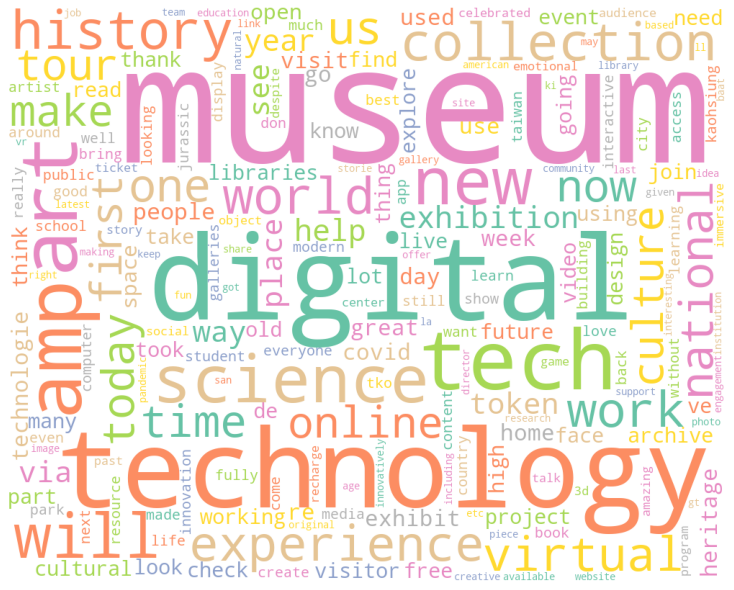

In [85]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.cleaned_tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [86]:
df.to_csv("Cleaned_Tweet.csv")

# Data Analysis

In [87]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [88]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [89]:
df.dropna(subset=['cleaned_tweets'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [90]:
df['Subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['Polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity
0,0,0,NaN,"is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture!",NaN,NaN,2019-12-31,2019,12,is an immersive museum that explores the history and cultural phenomenon of selfies the roots of selfies date back 40 000 years visitors can explore the origin of the selfie through the lens of art history technology and culture,0.050000,0.050000
1,1,1,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,NaN,NaN,2019-12-31,2019,12,they are my space elevators all world will know and come and see park and museum are mine gravity technology for entertainment is mine iran has no right to sell it,0.535714,-0.142857
2,2,2,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,NaN,NaN,2019-12-31,2019,12,some of y all never listened mathematics by mos def and it shows by the way did y all see he releasing his new album in a museum not social media making people leave they phones at the door separating the technology from the experience,0.260606,0.059848
3,3,3,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog,NaN,NaN,2019-12-31,2019,12,art and technology run wild at new york s akc museum of the dog,0.427273,0.118182
4,4,4,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",NaN,NaN,2020-01-01,2020,1,this is cool after initial confusion the military looked at how they could work with the new technology to get more museum visits this gels with my experience despite the stereotype military people are actually quite innovative,0.363068,0.160795


In [91]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
df.head()



,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,NaN,"is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture!",NaN,NaN,2019-12-31,2019,12,is an immersive museum that explores the history and cultural phenomenon of selfies the roots of selfies date back 40 000 years visitors can explore the origin of the selfie through the lens of art history technology and culture,0.050000,0.050000,Positive,Opinion
1,1,1,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,NaN,NaN,2019-12-31,2019,12,they are my space elevators all world will know and come and see park and museum are mine gravity technology for entertainment is mine iran has no right to sell it,0.535714,-0.142857,Negative,Opinion
2,2,2,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,NaN,NaN,2019-12-31,2019,12,some of y all never listened mathematics by mos def and it shows by the way did y all see he releasing his new album in a museum not social media making people leave they phones at the door separating the technology from the experience,0.260606,0.059848,Positive,Opinion
3,3,3,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog,NaN,NaN,2019-12-31,2019,12,art and technology run wild at new york s akc museum of the dog,0.427273,0.118182,Positive,Opinion
4,4,4,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",NaN,NaN,2020-01-01,2020,1,this is cool after initial confusion the military looked at how they could work with the new technology to get more museum visits this gels with my experience despite the stereotype military people are actually quite innovative,0.363068,0.160795,Positive,Opinion


In [92]:
df.to_csv("Cleaned_Tweet.csv")

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             25420 non-null  int64  
 1   Unnamed: 0.1           25420 non-null  int64  
 2   place                  207 non-null    object 
 3   tweet                  25420 non-null  object 
 4   near                   0 non-null      float64
 5   geo                    0 non-null      float64
 6   Date                   25420 non-null  object 
 7   Year                   25420 non-null  int64  
 8   Month                  25420 non-null  int64  
 9   cleaned_tweets         25420 non-null  object 
 10  Subjectivity           25420 non-null  float64
 11  Polarity               25420 non-null  float64
 12  Analysis_Polarity      25420 non-null  object 
 13  Analysis_Subjectivity  25420 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 2.7+ 

# SENTIMENT ANALYSIS

In [96]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

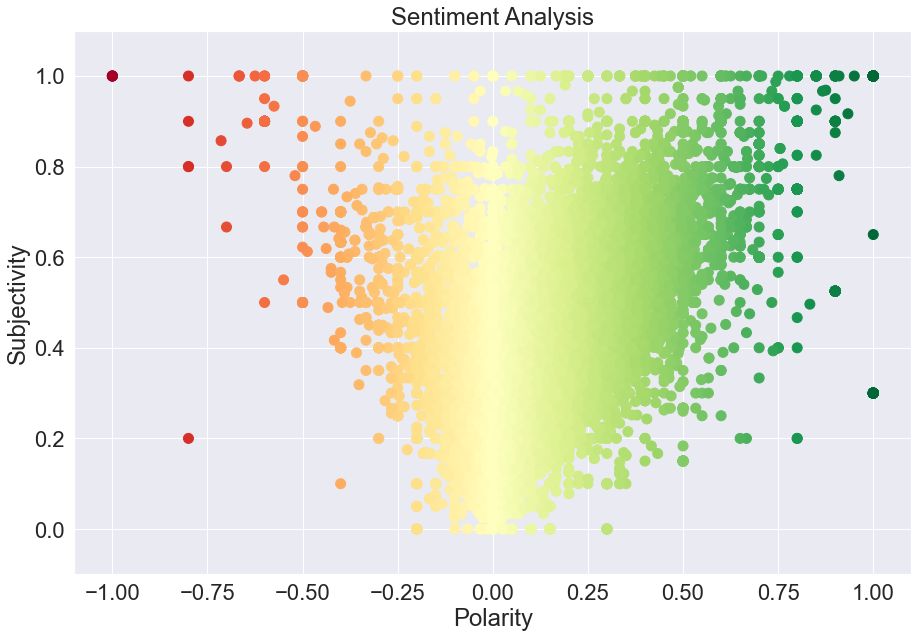

(None,)

In [97]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [98]:
# Show the value counts
df['Analysis_Polarity'].value_counts()

Positive    15512
Neutral      7336
Negative     2572
Name: Analysis_Polarity, dtype: int64

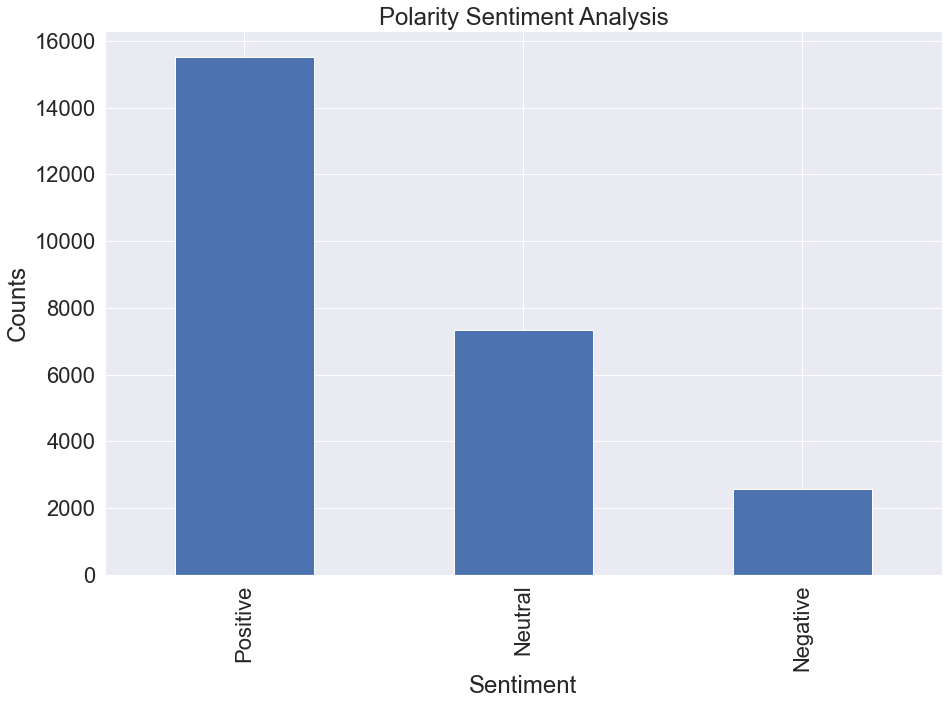

In [99]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

# Sentiment Analysis Pie Chart

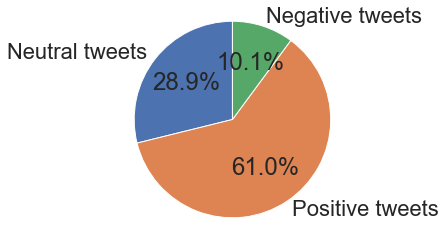

In [100]:
positive_polarity = [p for p in df['Polarity'] if p>0]
negative_polarity = [n for n in df['Polarity'] if n<0]
neutral_polarity = [r for r in df['Polarity'] if r==0]

total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size

labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
	        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

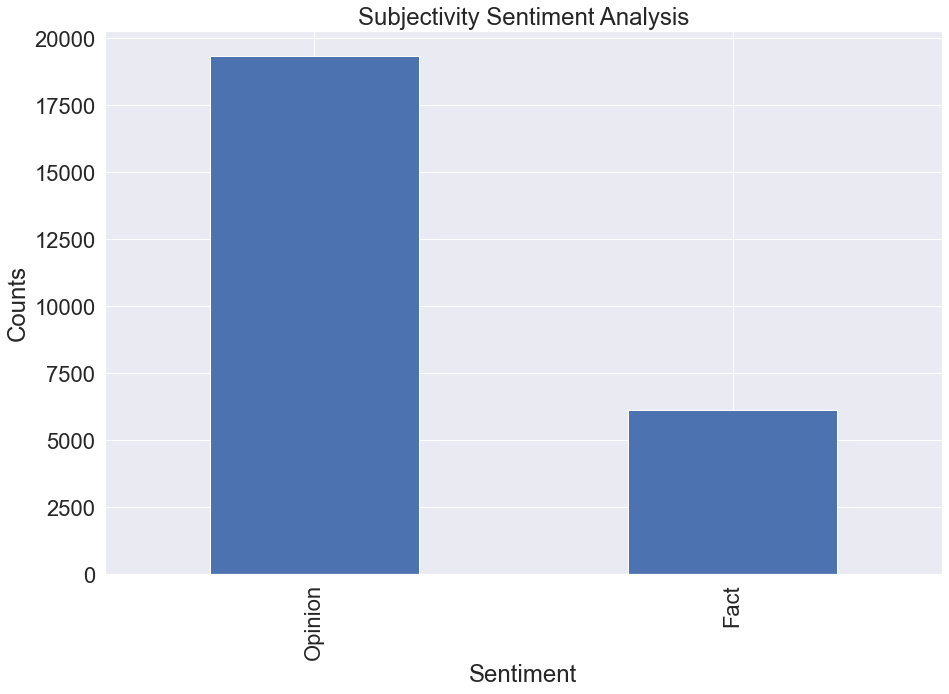

In [101]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [102]:
# Show the value counts
df['Analysis_Subjectivity'].value_counts()

Opinion    19311
Fact        6109
Name: Analysis_Subjectivity, dtype: int64

# TOPIC MODELING

In [188]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [189]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['cleaned_tweets'].values.astype('U'))
print(dtm_tf.shape)

(25420, 4528)


In [190]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_tweets'].values.astype('U'))
print(dtm_tfidf.shape)

(25420, 4528)


In [191]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=8, random_state=50)

In [192]:
#for i,topic in enumerate(lda_tf.components_):
#print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
#print('\n')

In [193]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['game', 'great', 'display', 'video', 'piece', 'need', 'social', 'high', 'ago', 'make', 'don', 'look', 'use', 'know', 'think', 'good', 'really', 'time', 'work', 'people', 'love', 'museums', 'old', 'new', 'years', 'just', 'digital', 'like', 'tech', 'technology']


Top 10 words for topic #1:
['paget', 'natural', 'day', 'week', 'students', 'jose', 'kids', 'canada', 'china', 'space', 'life', 'open', 'children', 'news', 'new', 'engineering', 'digital', 'virtual', 'history', 'san', 'art', 'kaohsiung', 'taiwan', 'amp', 'tech', 'took', 'place', 'national', 'science', 'technology']


Top 10 words for topic #2:
['fashion', 'los', 'discover', 'history', 'port', 'station', 'century', 'light', 'using', 'digital', 'amp', 'world', 'observing', 'fix', 'alternative', 'replace', 'leaving', 'given', 'visit', 'jurassic', 'cultural', 'museums', 'going', 'experience', 'face', 'way', 'home', 'tour', 'art', 'technology']


Top 10 words for topic #3:
['virtual', 'sounds', 'amp', 'pas

In [194]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.016290 -0.049288       1        1  27.160249
0      0.122144 -0.099058       2        1  15.594289
6      0.079103 -0.053463       3        1  14.991470
7      0.101668 -0.048410       4        1  12.598990
1      0.109901 -0.018329       5        1  10.112315
2      0.020239  0.028706       6        1   7.340413
4     -0.384748 -0.121754       7        1   6.717319
3     -0.064597  0.361596       8        1   5.484954, topic_info=            Term         Freq        Total Category  logprob  loglift
3552     science  2709.000000  2709.000000  Default  30.0000  30.0000
4014  technology  8855.000000  8855.000000  Default  29.0000  29.0000
2680    national  1296.000000  1296.000000  Default  28.0000  28.0000
2663     museums  5982.000000  5982.000000  Default  27.0000  27.0000
226          art  3625.000000  3625.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
226          art   270.456190  3625.708653   Topic8  -4.1326   0.3075
2801      online   177.673296  1131.971605   Topic8  -4.5527   1.0514
4014  technology   186.218312  8855.329544   Topic8  -4.5058  -0.9587
137          amp   162.714721  3923.263679   Topic8  -4.6407  -0.2795
4325     virtual   135.999258  1380.250329   Topic8  -4.8200   0.5858

[540 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
12        4  0.988524  academic
19        1  0.721775    access
19        2  0.070476    access
19        3  0.123941    access
19        4  0.082627    access
...     ...       ...       ...
4507      4  0.093973     years
4507      5  0.039758     years
4507      6  0.001807     years
4507      8  0.036144     years
4518      3  0.986108      zaha

[1099 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 7, 8, 2, 3, 5, 4])

In [195]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

(25420, 8)

In [196]:
df.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,world,world,NaN,"is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture!",NaN,NaN,2019-12-31,2019,12,is an immersive museum that explores the history and cultural phenomenon of selfies the roots of selfies date back 40 000 years visitors can explore the origin of the selfie through the lens of art history technology and culture,0.05,0.05,Positive,Opinion,3
1,experiences,experiences,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,NaN,NaN,2019-12-31,2019,12,they are my space elevators all world will know and come and see park and museum are mine gravity technology for entertainment is mine iran has no right to sell it,0.535714,-0.142857,Negative,Opinion,6
2,live,live,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,NaN,NaN,2019-12-31,2019,12,some of y all never listened mathematics by mos def and it shows by the way did y all see he releasing his new album in a museum not social media making people leave they phones at the door separating the technology from the experience,0.260606,0.0598485,Positive,Opinion,0
3,galleries,galleries,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog,NaN,NaN,2019-12-31,2019,12,art and technology run wild at new york s akc museum of the dog,0.427273,0.118182,Positive,Opinion,2
4,free,free,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",NaN,NaN,2020-01-01,2020,experiences,this is cool after initial confusion the military looked at how they could work with the new technology to get more museum visits this gels with my experience despite the stereotype military people are actually quite innovative,0.363068,0.160795,Positive,Opinion,0


In [197]:
# for TF DTM
#lda_tf = LatentDirichletAllocation(n_components =6, random_state=42)
#lda_tf.fit(dtm_tf)
# for TFIDF DTM
#lda_tfidf = LatentDirichletAllocation(n_components =6, random_state=42)
#lda_tfidf.fit(dtm_tfidf)

In [198]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'place', 'tweet', 'near', 'geo', 'Date',
       'Year', 'Month', 'cleaned_tweets', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity', 'Topic'],
      dtype='object')

In [206]:
df_1=df.replace({0:'world',1:'experiences',2:'live',3:'galleries',4:'free',5:'learning',6:'virtual',7:'digital'})

In [207]:
df_1['Topic'] = topic_values.argmax(axis=1)

In [208]:
df['Topic'] = topic_values.argmax(axis=1)

In [209]:
df_1.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,world,world,NaN,"is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture!",NaN,NaN,2019-12-31,2019,12,is an immersive museum that explores the history and cultural phenomenon of selfies the roots of selfies date back 40 000 years visitors can explore the origin of the selfie through the lens of art history technology and culture,0.05,0.05,Positive,Opinion,3
1,experiences,experiences,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,NaN,NaN,2019-12-31,2019,12,they are my space elevators all world will know and come and see park and museum are mine gravity technology for entertainment is mine iran has no right to sell it,0.535714,-0.142857,Negative,Opinion,6
2,live,live,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,NaN,NaN,2019-12-31,2019,12,some of y all never listened mathematics by mos def and it shows by the way did y all see he releasing his new album in a museum not social media making people leave they phones at the door separating the technology from the experience,0.260606,0.0598485,Positive,Opinion,0
3,galleries,galleries,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog,NaN,NaN,2019-12-31,2019,12,art and technology run wild at new york s akc museum of the dog,0.427273,0.118182,Positive,Opinion,2
4,free,free,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",NaN,NaN,2020-01-01,2020,experiences,this is cool after initial confusion the military looked at how they could work with the new technology to get more museum visits this gels with my experience despite the stereotype military people are actually quite innovative,0.363068,0.160795,Positive,Opinion,0


In [210]:
df_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'place', 'tweet', 'near', 'geo', 'Date',
       'Year', 'Month', 'cleaned_tweets', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity', 'Topic'],
      dtype='object')

TypeError: unsupported operand type(s) for +: 'float' and 'str'

<Figure size 2880x1800 with 0 Axes>

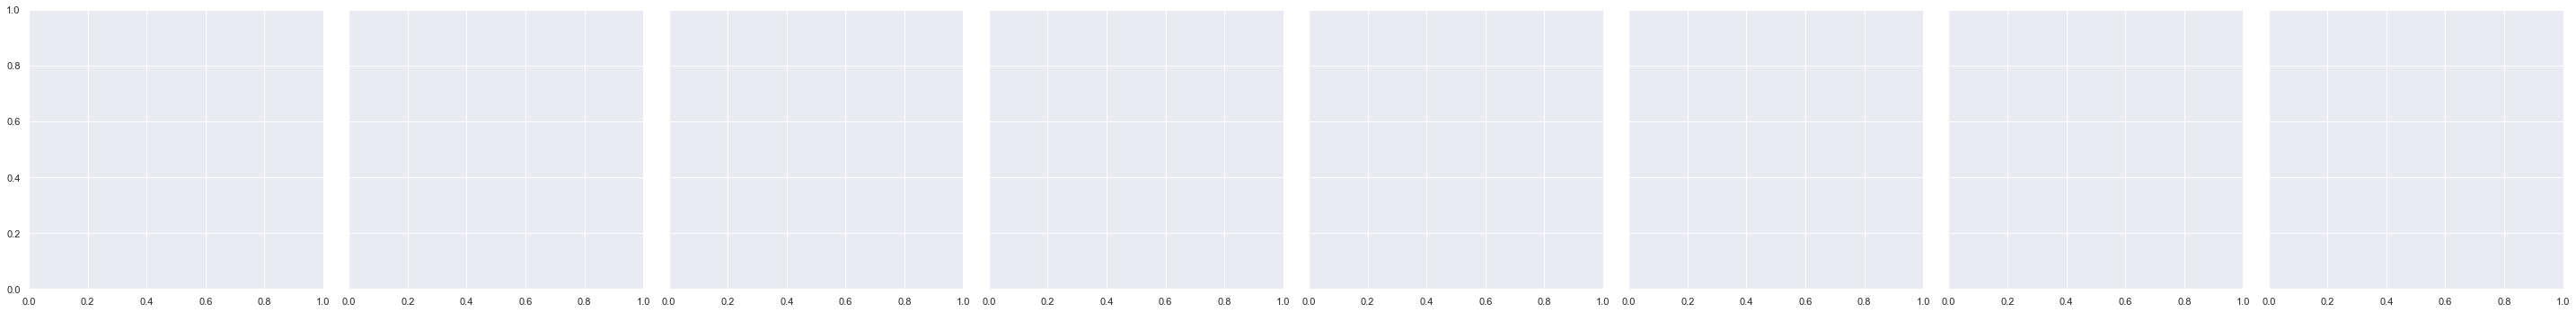

In [212]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [213]:
df2 = df_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df2

Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
0,601,1028,2973
1,232,1419,1056
2,109,673,869
3,67,191,607
4,62,477,475
5,566,1827,5108
6,471,954,2542
7,464,767,1882


In [214]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Negative  8 non-null      int64
 1   Neutral   8 non-null      int64
 2   Positive  8 non-null      int64
dtypes: int64(3)
memory usage: 256.0 bytes


In [215]:
df2['Total'] = df2.sum(axis=1)

In [216]:
df2.columns

Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [217]:
for i in df2:
    df2[i] = round(df2[i]*100/df2.Total)

df2

Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,13.0,22.0,65.0,100.0
1,9.0,52.0,39.0,100.0
2,7.0,41.0,53.0,100.0
3,8.0,22.0,70.0,100.0
4,6.0,47.0,47.0,100.0
5,8.0,24.0,68.0,100.0
6,12.0,24.0,64.0,100.0
7,15.0,25.0,60.0,100.0


In [218]:
df2=df2.fillna(0)

In [181]:
#Conduct Polarity Topic Analysis using Tableau

df.to_excel("Polarity_Topic Modeling.xlsx")

In [182]:
df2= df2.drop(['Total'], axis=1)

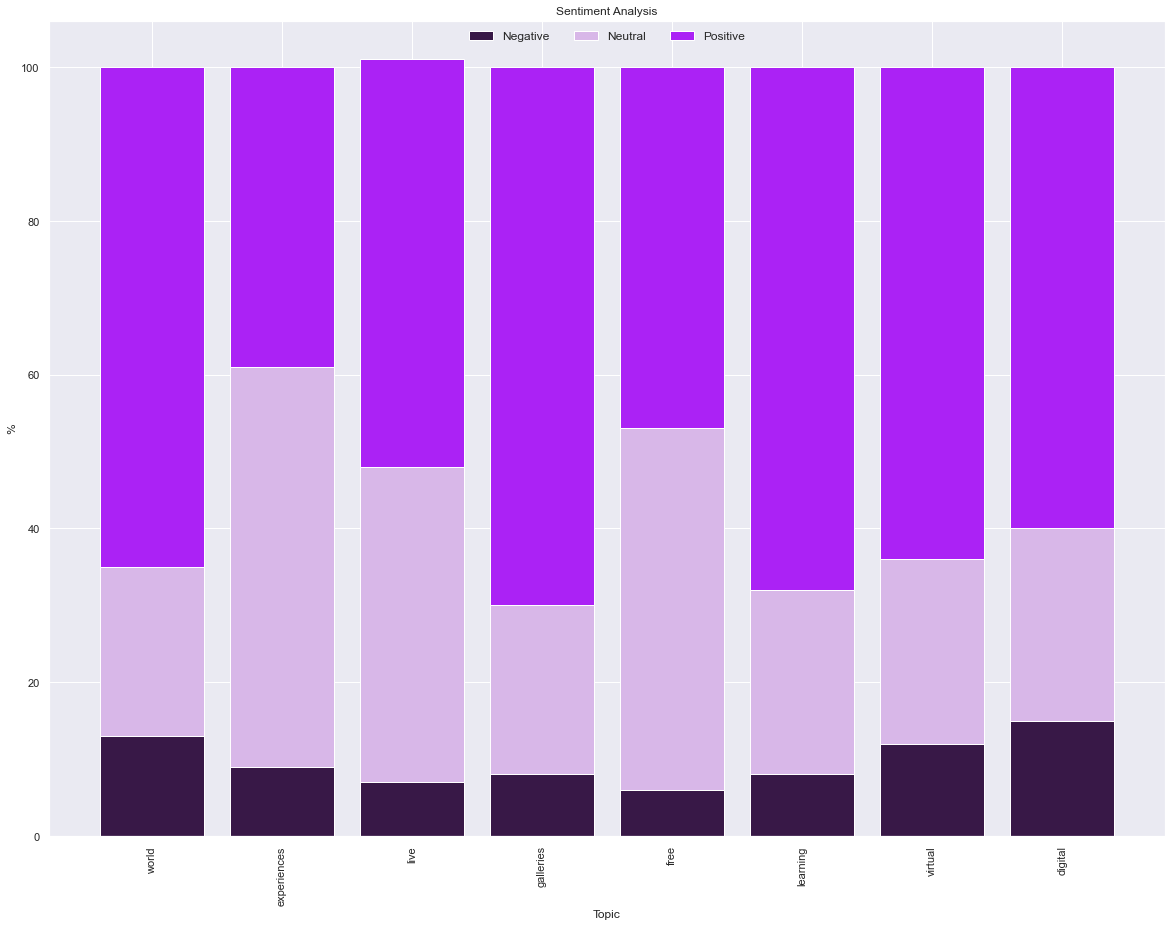

In [183]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 


topic = ['world','experiences','live','galleries','free','learning','virtual','digital']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df2['Negative'], color='#381847')
p2=plt.bar(topic,df2['Neutral'], color='#d8b7e8', bottom=df2['Negative'])
p3=plt.bar(topic,df2['Positive'], color='#ab22f5', bottom=df2['Neutral']+df2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()


In [132]:
df2.columns

Index(['Negative', 'Neutral', 'Positive'], dtype='object', name='Analysis_Polarity')

In [133]:
df=df.replace({0:'world',1:'experiences',2:'live',3:'galleries',4:'free',5:'learning',6:'virtual',7:'digital'})

In [134]:
df.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,world,world,NaN,"is an immersive museum that explores the history and cultural phenomenon of selfies. The roots of selfies date back 40,000 years! Visitors can explore the origin of the selfie through the lens of art, history, technology and culture!",NaN,NaN,2019-12-31,2019,12,is an immersive museum that explores the history and cultural phenomenon of selfies the roots of selfies date back 40 000 years visitors can explore the origin of the selfie through the lens of art history technology and culture,0.05,0.05,Positive,Opinion,galleries
1,experiences,experiences,NaN,They are my space elevators all world will know and come and see park and museum are mine. Gravity technology for entertainment is mine Iran has no right to sell it,NaN,NaN,2019-12-31,2019,12,they are my space elevators all world will know and come and see park and museum are mine gravity technology for entertainment is mine iran has no right to sell it,0.535714,-0.142857,Negative,Opinion,virtual
2,live,live,NaN,Some of y’all never listened mathematics by mos def... and it shows.. by the way did y’all see he releasing his new album in a museum not social media? Making people leave they phones at the door. Separating the technology from the experience,NaN,NaN,2019-12-31,2019,12,some of y all never listened mathematics by mos def and it shows by the way did y all see he releasing his new album in a museum not social media making people leave they phones at the door separating the technology from the experience,0.260606,0.0598485,Positive,Opinion,world
3,galleries,galleries,NaN,Art and Technology Run Wild at New York’s AKC Museum of the Dog,NaN,NaN,2019-12-31,2019,12,art and technology run wild at new york s akc museum of the dog,0.427273,0.118182,Positive,Opinion,live
4,free,free,NaN,"This is cool - after initial confusion, the military looked at how they could work with the new technology to get more museum visits. This gels with my experience. Despite the stereotype, military people are actually quite innovative.",NaN,NaN,2020-01-01,2020,experiences,this is cool after initial confusion the military looked at how they could work with the new technology to get more museum visits this gels with my experience despite the stereotype military people are actually quite innovative,0.363068,0.160795,Positive,Opinion,world


# Topic Counts

In [135]:
# Show the value counts
df['Topic'].value_counts()

learning       7501
world          4602
virtual        3967
digital        3113
experiences    2707
live           1651
free           1014
galleries       865
Name: Topic, dtype: int64

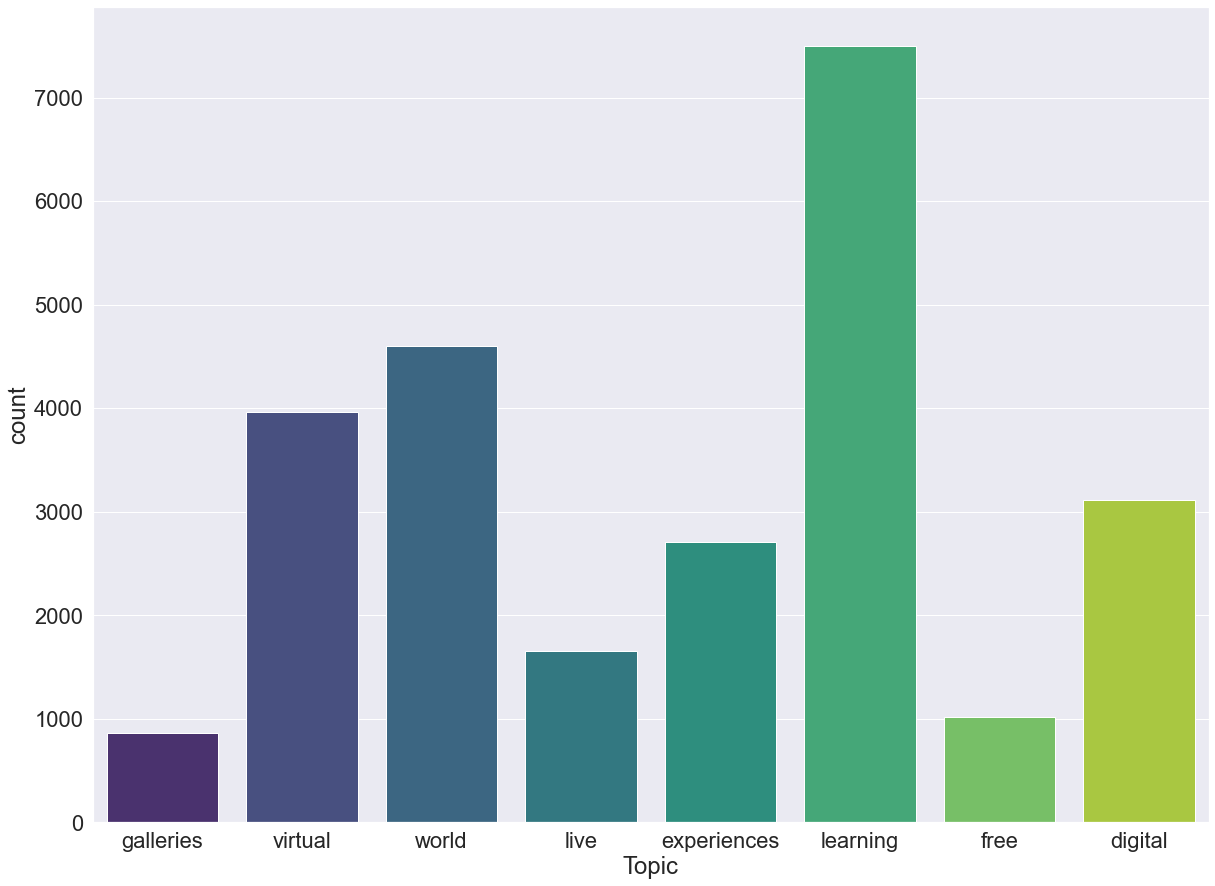

In [136]:
plt.figure(figsize=(20,15)) 
sns.countplot(x = 'Topic',data = df, palette = 'viridis')


# TREND ANALYSIS

In [137]:
# Create date range with frequency of a day
rng = pd.date_range(start='01/01/2020', end ='12/05/2020',freq='D')



In [138]:

df3 = df.groupby(['Date','Topic'])['cleaned_tweets'].count().reset_index()

In [139]:
df3

,Date,Topic,cleaned_tweets
0,2019-12-31,digital,1
1,2019-12-31,galleries,1
2,2019-12-31,live,1
3,2019-12-31,virtual,1
4,2019-12-31,world,3
...,...,...,...
2513,2020-12-03,galleries,4
2514,2020-12-03,learning,60
2515,2020-12-03,live,5
2516,2020-12-03,virtual,20


In [140]:
pivoted = df3.pivot( index='Date',columns='Topic', values='cleaned_tweets').reset_index()

In [141]:
pivoted

Topic,Date,digital,experiences,free,galleries,learning,live,virtual,world
0,2019-12-31,1.0,NaN,NaN,1.0,NaN,1.0,1.0,3.0
1,2020-01-01,3.0,4.0,1.0,1.0,3.0,1.0,1.0,4.0
2,2020-01-02,7.0,5.0,NaN,4.0,3.0,3.0,4.0,9.0
3,2020-01-03,3.0,2.0,NaN,2.0,2.0,2.0,5.0,14.0
4,2020-01-04,1.0,8.0,1.0,1.0,2.0,3.0,18.0,7.0
...,...,...,...,...,...,...,...,...,...
334,2020-11-29,12.0,4.0,246.0,2.0,30.0,5.0,10.0,21.0
335,2020-11-30,22.0,5.0,71.0,2.0,70.0,10.0,34.0,28.0
336,2020-12-01,23.0,11.0,56.0,5.0,78.0,11.0,41.0,25.0
337,2020-12-02,22.0,6.0,35.0,6.0,68.0,4.0,29.0,28.0


In [142]:
pivoted=pivoted.fillna(0)

In [143]:
pivoted.to_csv("tweets_by_date.csv")

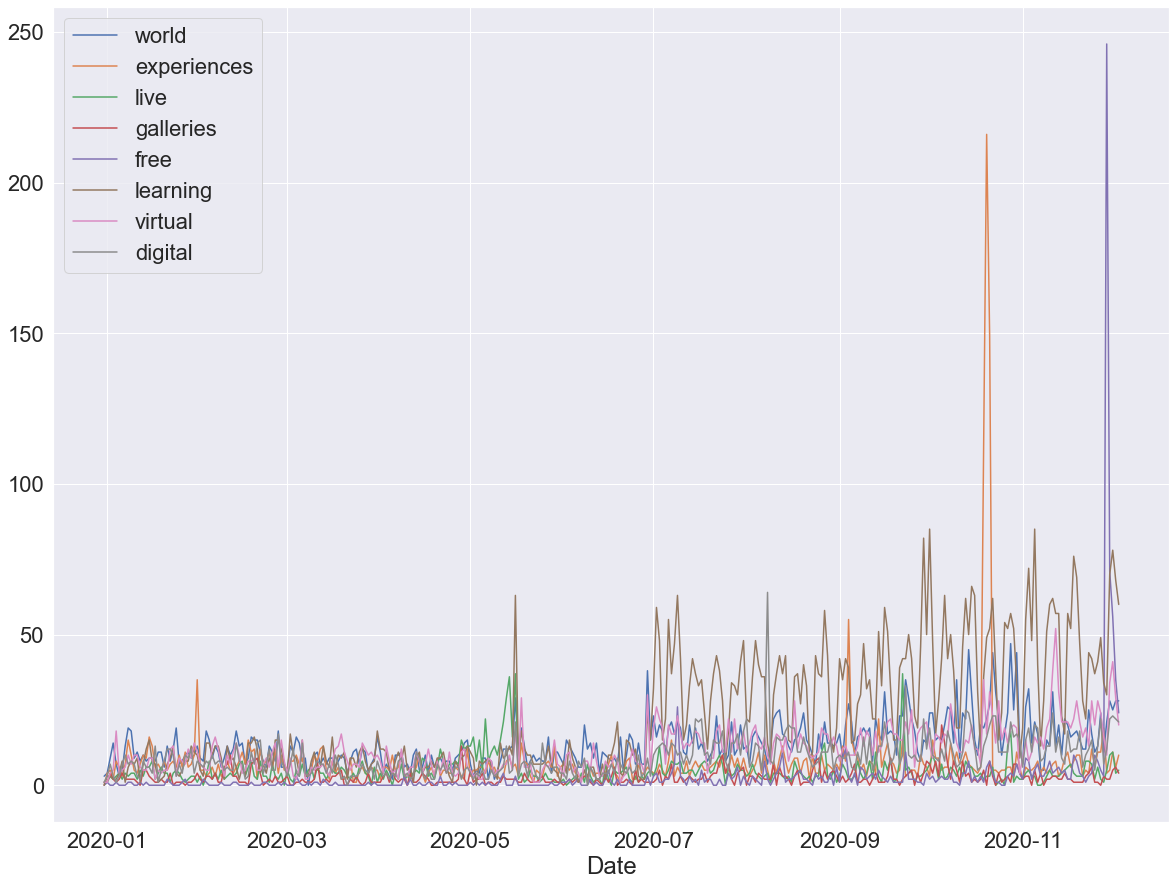

In [144]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,15)) 

# gca stands for 'get current axis'
ax = plt.gca()

pivoted.plot(kind='line', x='Date', y='world', label='world',ax=ax)
pivoted.plot(kind='line', x='Date', y='experiences', label='experiences',ax=ax)
pivoted.plot(kind='line', x='Date', y='live', label='live',ax=ax)
pivoted.plot(kind='line', x='Date', y='galleries', label='galleries',ax=ax)
pivoted.plot(kind='line', x='Date', y='free', label='free',ax=ax)
pivoted.plot(kind='line', x='Date', y='learning', label='learning',ax=ax)
pivoted.plot(kind='line', x='Date', y='virtual', label='virtual',ax=ax)
pivoted.plot(kind='line', x='Date', y='digital', label='digital',ax=ax)


# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.legend()
plt.show()



# CLUSTER ANALYSIS WITH HEATMAP

In [145]:
# # Preparing a corpus for analysis and checking first 10 entries

corpus=[]
a=[]
for i in range(len(df['cleaned_tweets'])):
    a=df['cleaned_tweets'][i]
    corpus.append(a)
        
print(corpus[0:10])

['is an immersive museum that explores the history and cultural phenomenon of selfies the roots of selfies date back 40 000 years visitors can explore the origin of the selfie through the lens of art history technology and culture', 'they are my space elevators all world will know and come and see park and museum are mine gravity technology for entertainment is mine iran has no right to sell it', 'some of y all never listened mathematics by mos def and it shows by the way did y all see he releasing his new album in a museum not social media making people leave they phones at the door separating the technology from the experience', 'art and technology run wild at new york s akc museum of the dog', 'this is cool after initial confusion the military looked at how they could work with the new technology to get more museum visits this gels with my experience despite the stereotype military people are actually quite innovative', 'wax museum market technology world ep 30', 'going to wuhan sci

In [146]:
import os
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# init_notebook_mode(connected=True) #do not miss this line

C:\Users\fabol\AppData\Local\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [147]:
# removing common words and tokenizing
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

# print(dictionary)
# print(dictionary.token2id)

In [148]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [149]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [150]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [151]:
total_topics = 2

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,10)

[(0,
  '0.032*"museum" + 0.031*"digital" + 0.012*"museums" + 0.007*"art" + 0.007*"collection" + 0.007*"world" + 0.006*"technology" + 0.006*"new" + 0.006*"today" + 0.006*"make"'),
 (1,
  '0.054*"digital" + 0.033*"museum" + 0.017*"museums" + 0.012*"amp" + 0.010*"art" + 0.006*"online" + 0.006*"virtual" + 0.005*"tech" + 0.004*"new" + 0.004*"via"')]

In [152]:

total_topics = 3

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,10)

[(0,
  '0.042*"digital" + 0.033*"museum" + 0.012*"museums" + 0.011*"collection" + 0.010*"today" + 0.008*"help" + 0.008*"technology" + 0.008*"covid" + 0.008*"new" + 0.008*"working"'),
 (1,
  '0.029*"museum" + 0.022*"digital" + 0.018*"museums" + 0.011*"tech" + 0.006*"one" + 0.006*"like" + 0.006*"art" + 0.006*"amp" + 0.004*"work" + 0.004*"new"'),
 (2,
  '0.063*"digital" + 0.036*"museum" + 0.014*"museums" + 0.013*"art" + 0.013*"amp" + 0.007*"online" + 0.006*"2020" + 0.005*"virtual" + 0.005*"week" + 0.005*"heritage"')]

In [153]:
data_lda = {i: OrderedDict(lda.show_topic(i,10)) for i in range(total_topics)}
data_lda

{0: OrderedDict([('digital', 0.041939147),
              ('museum', 0.033499334),
              ('museums', 0.012164925),
              ('collection', 0.010663258),
              ('today', 0.009726633),
              ('help', 0.008272169),
              ('technology', 0.008178449),
              ('covid', 0.008127091),
              ('new', 0.008007791),
              ('working', 0.007995648)]),
 1: OrderedDict([('museum', 0.029042985),
              ('digital', 0.021840887),
              ('museums', 0.018026458),
              ('tech', 0.0105498945),
              ('one', 0.006075783),
              ('like', 0.006068071),
              ('art', 0.0059435912),
              ('amp', 0.0055014743),
              ('work', 0.0041829785),
              ('new', 0.0040265885)]),
 2: OrderedDict([('digital', 0.06327325),
              ('museum', 0.036493704),
              ('museums', 0.014045672),
              ('art', 0.012819622),
              ('amp', 0.012527089),
              ('online',

In [154]:

df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(3, 21)


In [155]:
df_lda

,digital,museum,museums,collection,today,help,technology,covid,new,working,...,one,like,art,amp,work,online,2020,virtual,week,heritage
0,0.041939,0.033499,0.012165,0.010663,0.009727,0.008272,0.008178,0.008127,0.008008,0.007996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.021841,0.029043,0.018026,0.000000,0.000000,0.000000,0.000000,0.000000,0.004027,0.000000,...,0.006076,0.006068,0.005944,0.005501,0.004183,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.063273,0.036494,0.014046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.012820,0.012527,0.000000,0.006793,0.005668,0.005145,0.004969,0.004727


In [156]:
try_lda=df_lda.T

In [157]:
try_lda

,0,1,2
digital,0.041939,0.021841,0.063273
museum,0.033499,0.029043,0.036494
museums,0.012165,0.018026,0.014046
collection,0.010663,0.000000,0.000000
today,0.009727,0.000000,0.000000
help,0.008272,0.000000,0.000000
technology,0.008178,0.000000,0.000000
covid,0.008127,0.000000,0.000000
new,0.008008,0.004027,0.000000
working,0.007996,0.000000,0.000000


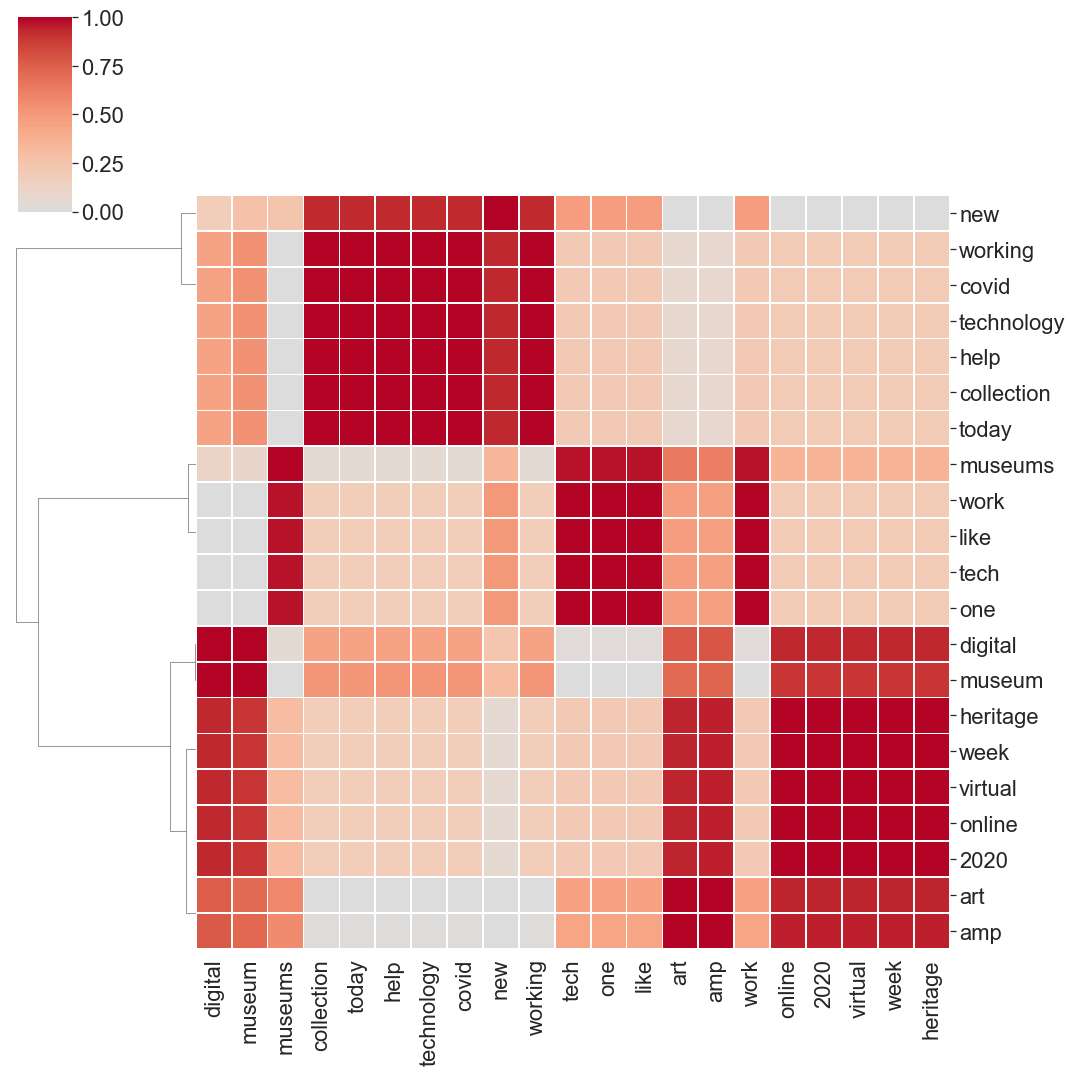

In [158]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="coolwarm", metric='cosine', linewidths=.75, figsize=(15, 15), col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [159]:

# pyLDAvis.enable_notebook()
# panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
# panel

# CORRELATION 

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [161]:
dataset = pd.read_csv('tweets_by_date.csv')


# Statistical Summary

In [162]:
# Statistical summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,339.0,169.000000,98.005102,0.0,84.5,169.0,253.5,338.0
digital,339.0,9.182891,6.340594,0.0,5.0,8.0,12.0,64.0
experiences,339.0,7.985251,15.529408,0.0,4.0,6.0,8.0,216.0
free,339.0,2.991150,14.470023,0.0,0.0,1.0,3.0,246.0
galleries,339.0,2.551622,2.436074,0.0,1.0,2.0,3.0,20.0
learning,339.0,22.126844,19.527370,0.0,7.0,13.0,37.0,85.0
live,339.0,4.870206,4.699329,0.0,2.0,4.0,6.0,37.0
virtual,339.0,11.702065,7.357504,1.0,6.0,11.0,16.0,52.0
world,339.0,13.575221,7.403588,0.0,9.0,12.0,17.0,47.0


In [163]:
# Identify continuous variables
print(dataset.select_dtypes(['float']).columns)

Index(['digital', 'experiences', 'free', 'galleries', 'learning', 'live',
       'virtual', 'world'],
      dtype='object')


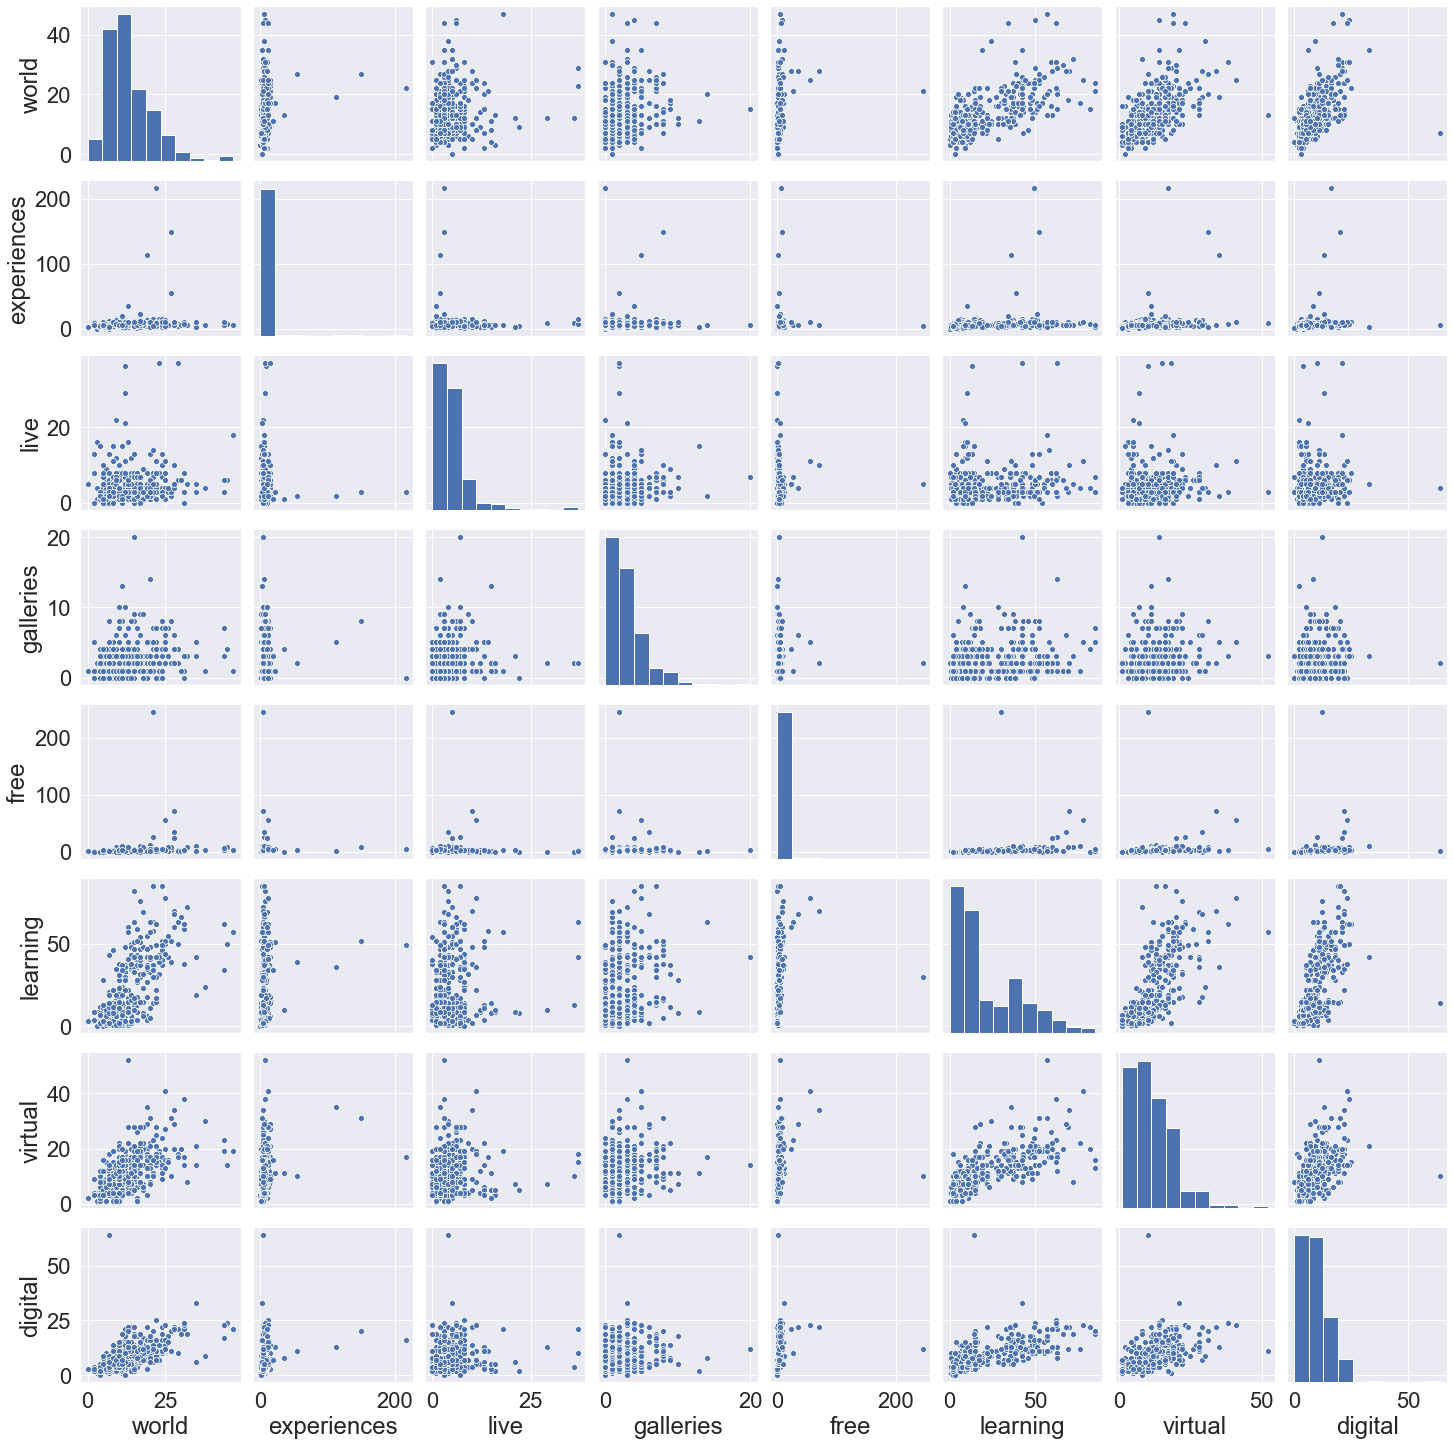

In [165]:

##Next, I want to compare the relationship (Correlation) between the identified topics in the dataset.

sns.pairplot(dataset[['world','experiences','live','galleries','free','learning','virtual','digital']])

plt.show()

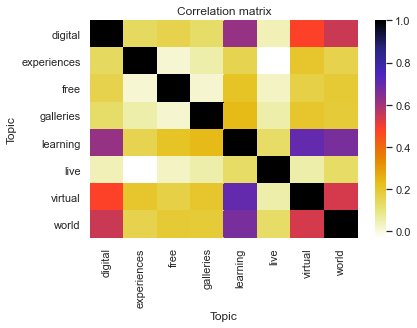

In [166]:
#This is another visual representation of Correlation Matrix to use
## SELECT COLORS https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


corrMatrix = pivoted.corr()

sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=False,
            xticklabels=corrMatrix.columns,
            yticklabels=corrMatrix.columns,
            cmap='CMRmap_r'
            )
plt.title('Correlation matrix')
plt.show()

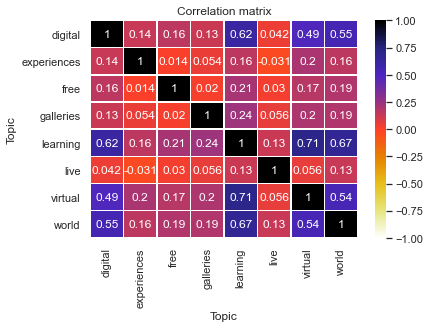

In [167]:
#This is another visual representation of Correlation Matrix to use
sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='CMRmap_r',square=False, vmin = -1, vmax = 1)
plt.title('Correlation matrix')

plt.show()

# CLUSTER ANALYSIS HEATMAP

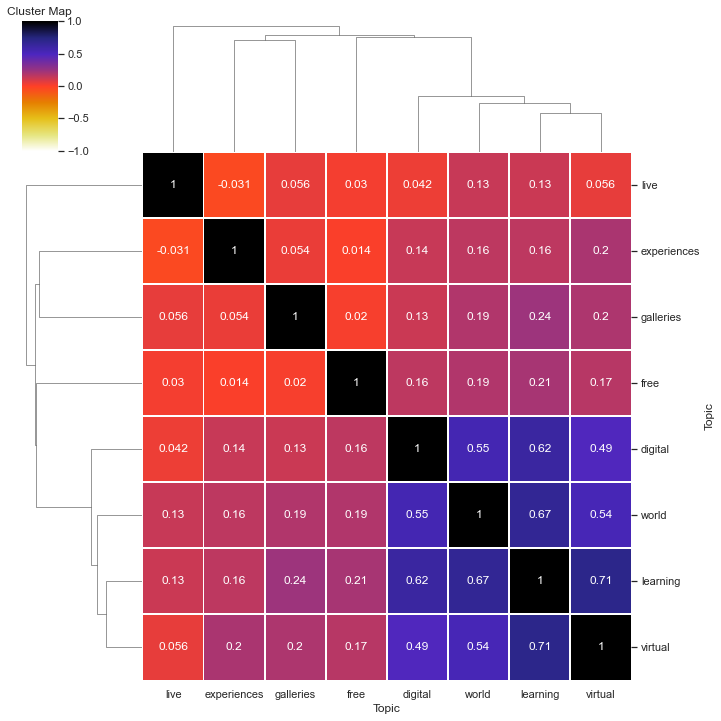

In [168]:
# Create cluter map
sns.clustermap(corrMatrix, annot=True, linewidth = 0.5, cmap='CMRmap_r',square=False, vmin = -1, vmax = 1)
plt.title('Cluster Map')

plt.show()